In [1]:
import pandas as pd
import numpy as np
from scipy import spatial
import scipy.sparse.linalg
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

###  Religion distances

In [2]:
data = pd.read_pickle(os.path.join(os.getcwd(),'data.pickle'))
data.reset_index(inplace=True)
data.drop([('name','')], axis=1, inplace=True)
data.set_index('ISO2', inplace=True)
cols = data.columns.tolist()[16:]
rel_data = data[cols]
rel_data.head()

gov_type_num    religion                                                 \
                  protestants catholics ortodox buddhism hindu jewish muslim   
ISO2                                                                           
AW           -1.0       0.049     0.753     0.0      0.0   0.0    0.0  0.000   
AF            1.0       0.000     0.000     0.0      0.0   0.0    0.0  0.997   
AO            1.0       0.381     0.411     0.0      0.0   0.0    0.0  0.000   
AI           -1.0       0.732     0.068     0.0      0.0   0.0    0.0  0.000   
AX            0.0       0.000     0.000     0.0      0.0   0.0    0.0  0.000   

                                                  
     oriental other animist atheist unaffiliated  
ISO2                                              
AW        0.0   0.0     0.0     0.0          0.0  
AF        0.0   0.0     0.0     0.0          0.0  
AO        0.0   0.0     0.0     0.0          0.0  
AI        0.0   0.0     0.0     0.0          0.0  
AX        0.0   0.0     0.0     0.0          0.0

In [3]:
rel_distances = spatial.distance.squareform(spatial.distance.pdist(rel_data,'euclidean'))

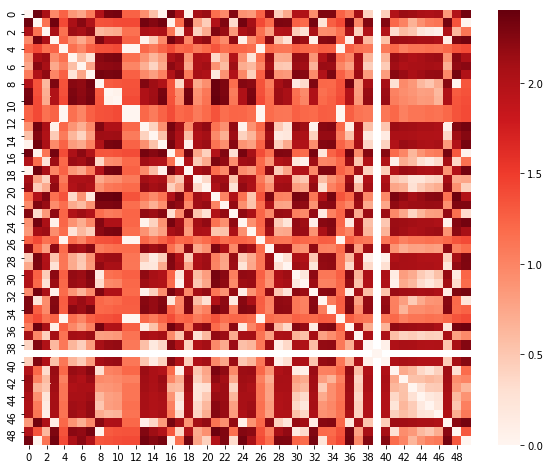

In [4]:
# displaying a subset of the distances matrix :
plt.figure(figsize=[10,8])
sns.heatmap(rel_distances[:50,:50],cmap="Reds");

In [5]:
rel_distance_df = pd.DataFrame(rel_distances, index=rel_data.index.tolist(), columns=rel_data.index.tolist())
rel_distance_df

,AW,AF,AO,AI,AX,AL,AD,AE,AR,AM,...,VG,VI,VN,VU,WF,WS,YE,ZA,ZM,ZW
AW,0.000000,2.358690,2.056013,0.967323,1.252761,0.868863,0.754593,1.070649,2.007269,2.313823,...,0.931486,2.112641,2.116556,0.905230,0.242012,0.877958,1.597339,0.752222,2.190712,2.225233
AF,2.358690,0.000000,1.143718,2.352543,1.412094,2.049274,2.234728,2.016003,1.356912,1.367518,...,2.344162,1.207356,1.001346,2.345077,2.444199,2.357694,1.000018,2.259053,1.265631,1.255845
AO,2.056013,1.143718,0.000000,2.059332,1.146334,2.137287,2.077037,2.198000,0.624341,0.690613,...,2.051118,0.220731,0.513470,2.045515,2.116696,2.041106,1.515310,2.028805,0.426691,0.499813
AI,0.967323,2.352543,2.059332,0.000000,1.241148,0.928957,0.735152,0.997190,2.287629,2.011527,...,0.041255,2.023400,2.128139,0.064498,1.177246,0.126143,1.588247,0.366320,2.004594,2.000246
AX,1.252761,1.412094,1.146334,1.241148,0.000000,1.155904,1.000000,1.259246,1.359117,1.369707,...,1.225188,1.209835,1.005325,1.226938,1.407160,1.250884,0.991000,1.067343,1.267996,1.258228
AL,0.868863,2.049274,2.137287,0.928957,1.155904,0.000000,0.579753,0.244894,2.235914,2.283026,...,0.905207,2.175273,2.081456,0.903708,1.057456,0.928453,1.092886,0.666427,2.214391,2.214148
AD,0.754593,2.234728,2.077037,0.735152,1.000000,0.579753,0.000000,0.765310,2.201636,2.208188,...,0.707874,2.112747,2.002668,0.710898,0.990000,0.751473,1.407864,0.373125,2.146582,2.140826
AE,1.070649,2.016003,2.198000,0.997190,1.259246,0.244894,0.765310,0.000000,2.330086,2.300721,...,0.980013,2.223331,2.143184,0.982383,1.251319,1.009818,1.030272,0.797648,2.248994,2.243260
AR,2.007269,1.356912,0.624341,2.287629,1.359117,2.235914,2.201636,2.330086,0.000000,1.298405,...,2.270781,0.813449,0.857950,2.257524,2.001424,2.241855,1.682047,2.200260,1.026262,1.115983
AM,2.313823,1.367518,0.690613,2.011527,1.369707,2.283026,2.208188,2.300721,1.298405,0.000000,...,2.015698,0.485094,0.932699,2.017690,2.419958,2.020331,1.690614,2.080905,0.272567,0.195921


### Government type distances

In [6]:
data = pd.read_pickle(os.path.join('..','DataEnriching','data.pickle'))
data.reset_index(inplace=True)
data.set_index('ISO2', inplace=True)

In [7]:
gov_type_df = data[['gov_type_num']]

gov_distance_df = pd.DataFrame(columns=gov_type_df.index.tolist())

for country1, value1 in zip(gov_type_df.index.tolist(), gov_type_df['gov_type_num']):
    row = []
    for country1, value2 in zip(gov_type_df.index.tolist(), gov_type_df['gov_type_num']):
        row.append(abs(value1-value2))
    
    
    dictionary = dict(zip(data.index.tolist(), row))
    gov_distance_df = gov_distance_df.append(dictionary, ignore_index=True)
    
gov_distance_df.index = gov_type_df.index
gov_distance_df

,AW,AF,AO,AI,AX,AL,AD,AE,AR,AM,...,VG,VI,VN,VU,WF,WS,YE,ZA,ZM,ZW
ISO2,,,,,,,,,,,,,,,,,,,,,
AW,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
AF,2.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,...,2.0,0.0,0.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0
AO,2.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,...,2.0,0.0,0.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0
AI,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
AX,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
AL,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
AD,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
AE,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,...,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
AR,2.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,...,2.0,0.0,0.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0


In [8]:
rel_distance_df.to_pickle('rel_distance_df.pickle')
gov_distance_df.to_pickle('gov_distance_df.pickle')